In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET con fuente Cs-137
#data = pd.read_csv('ActPET.txt', delim_whitespace =True)

###Activimetro 55tR con fuente Co-57
data = pd.read_csv('ActRF55tR.txt', delim_whitespace =True)


data.head()

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion
0,1,11/20/18,-0.02,0.42,156.0,144.0,0.9
1,2,11/21/18,-0.02,0.35,156.0,145.2,0.1
2,3,11/22/18,-0.02,2.13,156.0,144.6,0.5
3,4,11/23/18,-0.02,1.67,156.0,143.8,1.0
4,5,11/26/18,-0.02,0.58,156.0,146.3,2.0


In [61]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,93.000000,-0.022865,1.452757,157.920000,142.667568,1.193027
std,53.549043,0.009719,6.202605,26.780908,2.338623,0.635332
min,1.000000,-0.100000,0.190000,147.000000,138.400000,0.000000
25%,47.000000,-0.030000,0.380000,156.000000,141.200000,0.700000
50%,93.000000,-0.020000,0.530000,156.000000,142.200000,1.200000
75%,139.000000,-0.020000,0.720000,156.000000,143.800000,1.600000
max,185.000000,0.030000,60.000000,520.100000,156.000000,3.100000


In [62]:
##### de mCi a Bq
mcibq=3.7E7

##### de uCi a Bq
ucibq=3.7E4

## Fuentes Chequeo MN

In [63]:
### Fuentes de Chequeo en Medicina Nuclear 

##############################
########   Co 57  ###########

#Fecha de referencia
# primero de noviembre de 2015
Co='01/11/2015'
Co57= datetime.datetime.strptime(Co,'%d/%m/%Y')
#Actividad en mCi
AcCo= 5.774
#Actividad en Bq [1/s]
#AcCobq= AcCo*mcibq
### half life [días]
HLCo= 271.74
### half life [s]
HLCobq= 271.74*86400
### Lambda
Lambdaco= np.log(2)/HLCo
### Lambda [1/s]
Lambdacobq= np.log(2)/HLCobq

#############################################
######## Medicina Nuclear Cs 137  ###########

#Fecha de referencia
# primero de noviembre de 2015
Cs='01/11/2015'
Cs137= datetime.datetime.strptime(Cs,'%d/%m/%Y')
#Actividad en uCi
AcCs= 214.9
#Actividad en Bq [1/s]
#AcCsbq= AcCs*ucibq
### half life  [días]
HLCs= 30.08*365
### half life [s]
HLCsbq= HLCs*86400
### Lambda
Lambdacs= np.log(2)/HLCs
### Lambda [1/s]
Lambdacsbq= np.log(2)/HLCsbq



#############################################
######## Radiofarmacia Cs 137  ###########

#Fecha de referencia
# primero de Abril de 2007
Csrf='01/04/2007'
Cs137rf= datetime.datetime.strptime(Csrf,'%d/%m/%Y')
#Actividad en uCi
AcCsrf= 190.1
#Actividad en Bq [1/s]
#AcCsrfbq= AcCsrf*ucibq


### Lambda
Lambdacsrf= np.log(2)/HLCs

In [5]:
# import the visualization package: seaborn
#import seaborn as sns

In [6]:
#sns.set_context("talk",font_scale=1.4)

# PHASE 1 

In [7]:
##data['Actividad'][0:30]

## Medición de actividad 

In [8]:
##########   Co-57
#data['Incer']=(np.sqrt((data['Actividad']*mcibq)*Lambdacobq))/mcibq

##########   Cs-137
#data['Incer']=(np.sqrt((data['Actividad']*ucibq)*Lambdacsbq))/ucibq

### Practical Mathematics in Nuclear Medicine Technology, Patricia Wells

In [64]:
################# Elapsed time ###############

#data["Fecha"][0]

d = pd.to_datetime(data["Fecha"],format='%m/%d/%y')
###Cobalto 57
#timeE=(d-Co57)

### Cesio 137
#timeE=(d-Cs137)
timeE=(d-Cs137rf)

In [65]:
data['timeE']=timeE.dt.days.values

In [66]:
############# Expected Activity ###########
#### Act =Act_oe^{-\lambda t}

###Cobalto 57
#Actco=AcCo*np.exp(-Lambdaco*data["timeE"])*1000

###Cesio 137
Actcs=AcCsrf*np.exp(-Lambdacsrf*data["timeE"])

In [67]:
#### Cobalto 57
#data['EAct']=round(Actco,1)
#### Cesio 137
data['EAct']=round(Actcs,1)

In [68]:
############# Acceptable Range of dose calibrator readings ###########

### 10% ó 5%
X=data['EAct']*(0.05)


### Rango
Rmin=np.round(data['EAct']-X,1)
Rmax=np.round(data['EAct']+X,1)


### Ingresar datos en el data 
data['Rmin']=Rmin
data['Rmax']=Rmax

In [86]:
### Plot the data
ax1=plt.subplot(1,1,1)

ax1.errorbar(data['Number'],data['Actividad'],yerr=data['Incer'],fmt='.r',label='Experimento',capsize=6)
ax1.plot(data['Number'],data['Rmin'],'b--')
ax1.plot(data['Number'],data['Rmax'],'b--')


ax1.set_title('Actividad Co-57 CRC 55tR MN',fontsize=14)
ax1.set_xlabel('Número de Medida diaria',fontsize=14)
ax1.set_ylabel('Actividad [$\mu$Ci]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
ax1.legend()
ax1.set_yscale('log')
## Set second y-axis for MBq
#ax2 = ax1.twinx()
#kBqs = np.linspace(data['Actividad'].min(),data['Actividad'].max()*37,6) # Actividad en MBq
#ax2.set_yticks(kBqs/37) # Ponga los ticks
#ax2.set_yticklabels(kBqs.astype(int)) # Ponga los Labels
#ax2.yaxis.set_ticks_position('right') # set the position of the second x-axis to bottom
#ax2.yaxis.set_label_position('right') # set the position of the second x-axis to bottom
#ax2.spines['right'].set_position(('outward', 0))
#ax2.set_ylabel('Actividad [kBq]',fontsize=14)
#ax2.set_ylim(ax1.get_ylim())
#ax2.tick_params(axis='y',labelsize=14)


#plt.savefig('mncrc55tRcs.pdf')

#plt.legend()
#plt.title('TODOS')
#plt.ylabel('Actividad [$\mu$Ci]')
#plt.xlabel('Measurement number')

#### Percent error for dose calibrator accuracy and constancy, Pag 104

In [69]:
##Diferencia
#perce=np.absolute(((data['EAct']-data['Actividad'])*100)/data['EAct'])
perce=(-(data['EAct']-data['Actividad'])*100)/data['EAct']


percent=round(perce,1)

### Ingresar datos en el data 
data['percent']=percent
#percent

In [70]:
#plt.plot(data['Number'],data['percent'],'bo-')
#plt.plot((0, 439),(5,5), 'k:', linewidth=2) 
#plt.plot((0, 439),(-5,-5), 'k:', linewidth=2) 

#### Percent Outside

In [71]:
len(data[(np.absolute(data['percent'])>5.0)])

1

In [72]:
data[(np.absolute(data['percent'])>5.0)]

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion,timeE,EAct,Rmin,Rmax,percent
20,21,12/24/18,-0.02,0.35,147.0,156.0,2.1,4285,145.0,137.8,152.2,7.6


### Razones de Actividades 
\begin{equation}
\frac{\text{Actividad Medida}}{\text{Actividad Esperada}}
\end{equation}

In [73]:
razon=data['Actividad']/data['EAct']
#razoninc=data['Incer']/data['EAct']
data['razon']=round(razon,3)
#data['razon'].head(10)

#### Razón Outside

In [74]:
## Cuantos datos por fuera del rango según servicio
len(data[(data['razon']<0.95) | (data['razon']>1.05)])

1

In [75]:
#data[(data['razon']<0.95) | (data['razon']>1.05)]
data['razon'][0:31]

0     0.990
1     0.999
2     0.995
3     0.990
4     1.007
5     0.999
6     0.999
7     0.999
8     0.987
9     0.994
10    0.993
11    0.995
12    0.999
13    1.001
14    0.999
15    1.000
16    0.991
17    0.993
18    1.008
19    0.985
20    1.076
21    0.987
22    0.988
23    0.992
24    0.998
25    0.988
26    0.981
27    1.014
28    1.008
29    0.990
30    0.992
Name: razon, dtype: float64

## Amplifier offset 

In [37]:
#plt.plot(data['Number'],data['AjustemV'],'ob-')

In [38]:
#data['AjustemV'].value_counts()

In [17]:
###### Diferencia entre datos
diffajuste = data.AjustemV.diff()
diffajuste.replace(np.nan, 0.0, inplace=True)
data['Diffzero']=diffajuste

In [18]:
data['Diffzero'].describe()

count    439.000000
mean      -0.000023
std        0.025180
min       -0.250000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.250000
Name: Diffzero, dtype: float64

#### Offset Outside

In [19]:
## Cuantos datos por fuera del rango según fabricante
len(data[(np.absolute(data['Diffzero'])>0.3)])

0

In [20]:
#data[(np.absolute(data['Diffzero'])>0.3)]

### Voltaje

In [21]:
#plt.plot(data['Number'],data['Voltaje'],'b-')

In [22]:
#####  EQUIPOS 15R y  25 PET
Z=data['Voltaje'].mean()*(0.05)
Zmin=data['Voltaje'].mean()-Z
Zmax=data['Voltaje'].mean()+Z

#### Voltaje Outside

In [23]:
###fabricante 25 PET MN
len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
## Cuantos datos por fuera del rango según fabricante 55tR MN
#len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

0

In [24]:
#data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)]

### Fondo

In [25]:
#plt.plot(data['Number'],data['Fondo'],'ob-')

In [26]:
## Cuantos datos por fuera del protocolo INC 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])

0

In [27]:
#data[(data['Fondo']<0.0) | (data['Fondo']>15.0)]

# Limpieza Datos -Outliers
### CAPINTEC

In [28]:
######  Medicina Nuclear
###   CAPINTEC 25 PET MN 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
###   CAPINTEC 55 tR MN
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+ len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

4

In [29]:
data.loc[np.absolute(data['percent'])>5.0]= np.nan
data.dropna(subset=["percent"], axis=0, inplace=True)

In [30]:
#Localización y conversión a Not a Number NaN
data.loc[(data['razon']<0.95) | (data['razon']>1.05)]= np.nan
# simply drop whole row with NaN in "razon" column
data.dropna(subset=["razon"], axis=0, inplace=True)

In [31]:
#Localización y conversión a Not a Number NaN
data.loc[np.absolute(data['Diffzero'])>0.3]= np.nan
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Diffzero"], axis=0, inplace=True)

In [32]:
#Localización y conversión a Not a Number NaN
data.loc[(data['Fondo']<0.0) | (data['Fondo']>15.0)]= np.nan
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Fondo"], axis=0, inplace=True)

### Voltaje

In [33]:
##########################   Voltaje  ######################################
#Localización y conversión a Not a Number NaN
####### CAPINTEC 25 PET MN
data.loc[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)]= np.nan
####### CAPINTEC 55 tR MN
#data.loc[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)]= np.nan

In [34]:
# simply drop whole row with NaN in "Voltaje" column
data.dropna(subset=["Voltaje"], axis=0, inplace=True)

In [35]:
#reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [36]:
###   CAPINTEC 25 PET MN 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
###   CAPINTEC 55 tR MN
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+ len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

0

### Datos para Phase I

In [37]:
data[['AjustemV','Diffzero','Fondo','Voltaje','percent','razon']].describe()

,AjustemV,Diffzero,Fondo,Voltaje,percent,razon
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.018368,-0.000023,2.370575,155.296552,-1.306437,0.986936
std,0.029141,0.025295,3.200129,0.032015,1.041669,0.010417
min,0.010000,-0.250000,0.250000,155.000000,-3.600000,0.964000
25%,0.010000,0.000000,0.330000,155.300000,-2.200000,0.978000
50%,0.010000,0.000000,0.460000,155.300000,-1.800000,0.982000
75%,0.020000,0.000000,2.760000,155.300000,-0.100000,0.999000
max,0.260000,0.250000,11.860000,155.300000,1.000000,1.010000


In [38]:
#plt.plot(data['AjustemV'])
#plt.plot(data['Diffzero'])
#plt.plot(data['Fondo'])
#plt.plot(data['Voltaje'])
#plt.plot(data['percent'])
#plt.plot(data['razon'])

In [39]:
#plt.hist(data['AjustemV'])
#plt.hist(data['Diffzero'])
#plt.hist(data['Fondo'])
#plt.hist(data['Voltaje'])
#plt.hist(data['percent'])
#plt.hist(data['razon'])

In [40]:
from scipy.stats import skew, kurtosis

In [41]:
#### Kurtosis
#3+kurtosis(data['AjustemV'])

In [42]:
### Skew
#skew(data['AjustemV'])

In [43]:
xb=np.sort(data['Fondo'])

# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(xb, dist='norm')

#plot results
plt.plot(values, quantiles,'+b')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#plt.xlim([1.01,1.06])
#define ticks
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]

#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

Text(0.5,1,'Gráfico de probabilidad normal')

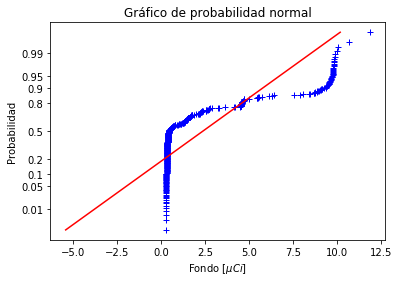

In [44]:
# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(xb, dist='norm')

#plot results
plt.plot(values, quantiles,'+b')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]

#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
#assign new ticks
plt.yticks(ticks_quan,ticks_perc)
plt.xlabel('Fondo [$\mu Ci$]')
plt.ylabel('Probabilidad')
plt.title('Gráfico de probabilidad normal')

## Capintec 25 PET MN: 
#### AjustemV: 

\begin{equation}
\text{Kurtosis}=10.60\;\;\; \text{Skewness}=-1.42
\end{equation}
    
#### Diffzero: 

\begin{equation}
\text{Kurtosis}=8.52\;\;\; \text{Skewness}=0.31
\end{equation}    

#### Fondo: 

\begin{equation}
\text{Kurtosis}=3.69\;\;\; \text{Skewness}=0.25
\end{equation} 

#### Voltaje: 

\begin{equation}
\text{Kurtosis}=13.52\;\;\; \text{Skewness}=2.32
\end{equation} 

#### percent: 

\begin{equation}
\text{Kurtosis}=10.06\;\;\; \text{Skewness}=-1.92
\end{equation} 

#### razon: 

\begin{equation}
\text{Kurtosis}=10.06\;\;\; \text{Skewness}=-1.92
\end{equation} 

## Capintec 55 tR MN: 
#### AjustemV: 

\begin{equation}
\text{Kurtosis}=39.376551\;\;\; \text{Skewness}=5.972
\end{equation}
    
#### Diffzero: 

\begin{equation}
\text{Kurtosis}=69.9264829\;\;\; \text{Skewness}=0.14881
\end{equation}    

#### Fondo: 

\begin{equation}
\text{Kurtosis}=3.687477\;\;\; \text{Skewness}=1.4787154
\end{equation} 

#### Voltaje: 

\begin{equation}
\text{Kurtosis}=85.0116\;\;\; \text{Skewness}=-9.1657857
\end{equation} 

#### percent: 

\begin{equation}
\text{Kurtosis}=1.6218\;\;\; \text{Skewness}=0.3445
\end{equation} 

#### razon: 

\begin{equation}
\text{Kurtosis}=1.6218\;\;\; \text{Skewness}=0.3445
\end{equation} 

Asumir normalidad según kurtosis y skewness solo posible para los datos de Fondo

## Rejection data

In [45]:
to=(np.absolute(data['AjustemV']-data['AjustemV'].mean()))/data['AjustemV'].std()

In [46]:
prob=np.round(1-(norm.cdf(to)-norm.cdf(-to)),2)
data['prob']= prob

In [47]:
no= data['AjustemV'].count()*prob
#no

In [48]:
#len(no[no<0.5])
len(no[no<4.5])

13

In [49]:
data['no']= no

In [50]:
data.loc[np.absolute(data['no'])<4.5]= np.nan
data.dropna(subset=["no"], axis=0, inplace=True)
#reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [51]:
data['AjustemV'].describe()

count    422.000000
mean       0.013578
std        0.004849
min        0.010000
25%        0.010000
50%        0.010000
75%        0.020000
max        0.030000
Name: AjustemV, dtype: float64

In [52]:
#plt.hist(data['percent'])

In [53]:
#sigma3p=data['percent'].mean()+(3*data['percent'].std())
#sigma3n=data['percent'].mean()-(3*data['percent'].std())

In [54]:
#grandmean=data['percent'].mean()grandmean

In [55]:
#plt.plot(data['Number'],data['percent'],'ob-')
#plt.plot((0,350),(sigma3p,sigma3p))
#plt.plot((0,350),(sigma3n,sigma3n))
#plt.plot((0,350),(grandmean,grandmean))

In [267]:
### Agrupar datos 
#y= data['AjustemV'].values.reshape(87,4)

In [268]:
#subgroup= pd.DataFrame(data=y)

In [269]:
# create headers list
#headers = ["n1","n2","n3","n4"]
#,"n5","n6"]
#subgroup.columns = headers

In [270]:
#mean=subgroup[["n1","n2","n3","n4"]].std(axis=1)
#subgroup['std']= mean

In [271]:
#subgroup['std'].mean()

# Grand

## Capintec 25 PET MN: 
#### AjustemV: 

\begin{equation}
\text{Grandmean}=-0.19482658959537574\;\;\; \text{Grandstd}=0.026
\end{equation}
    
#### Diffzero: 

\begin{equation}
\text{Grandmean}=-0.001079\;\;\; \text{Grandstd}= 0.028791
\end{equation}   

#### Fondo: 

\begin{equation}
\text{Grandmean}=5.276723\;\;\; \text{Grandstd}=1.24
\end{equation}

#### Voltaje: 

\begin{equation}
\text{Grandmean}=513.576744\;\;\; \text{Grandstd}=0.703871
\end{equation}

#### percent: 

\begin{equation}
\text{Grandmean}=3.094253\;\;\; \text{Grandstd}=0.564738
\end{equation}

#### razon: 

\begin{equation}
\text{Grandmean}= 1.030943\;\;\; \text{Grandstd}=0.005647
\end{equation}

In [382]:
z=np.array(data['AjustemV'])

In [383]:
np.savetxt('automatlab.txt',z,delimiter=" ",fmt='%s')